# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

b) Set to be the y variable in the dataframe from a and X to be the remaining features.

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal regularization parameter : 0.000774263682681


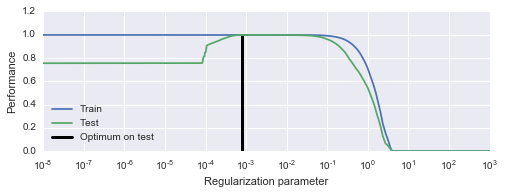

In [1]:
import pandas as pd

# part a
df = pd.read_csv('hw2data.csv')
df.head()

# part b
y = df['y']
X = df.drop('y',1)

# part c
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.stats as st
from sklearn.linear_model import Lasso
import seaborn
plt.subplot(2, 1, 1)

# Split the data into training/testing sets
size = 225
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
alphas = np.logspace(-8,3,1000)

train_errors=[]
test_errors=[]

for alpha in alphas:
    regr = Lasso(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train, y_train))
    test_errors.append(regr.score(X_test, y_test))

i_alpha_optim=np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# part d
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

plt.show()

e) Plot the top coefficients based on this optimal parameter. Why do you think so many are zero?

Many coefficients are zero since in the Lasso regression tends to result in sparser coefficients. Since the constraint is |B1| + |B2| = C, the level sets are mostly likely to be tangent at a corner where B1=B2=0. Both B1 and B2 are non-zero in only 4 directions, so it is very unlikely that the level sets is tangent to these 4 directions. 

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


array([  2.68495533e+00,   2.42528708e+00,   2.36621758e+00,
         1.85107135e+00,   1.78851718e+00,   1.45075541e+00,
         1.41562713e+00,   1.33163561e+00,   1.25595758e+00,
         1.07063566e+00,   1.00459600e+00,   9.93738760e-01,
         8.83775415e-01,   8.57979843e-01,   8.37247658e-01,
         7.94164494e-01,   5.98606959e-01,   5.39814097e-01,
         4.79695868e-01,   4.69323230e-01,   4.42128325e-01,
         3.79240735e-01,   3.60841625e-01,   3.53770339e-01,
         3.46575455e-01,   3.34381838e-01,   3.26274831e-01,
         3.11349040e-01,   3.08010402e-01,   3.00256150e-01,
         2.97425427e-01,   2.86345364e-01,   2.84292495e-01,
         2.53653931e-01,   2.53195333e-01,   2.51887292e-01,
         2.45806446e-01,   2.42294692e-01,   2.42213573e-01,
         2.31668065e-01,   2.24889290e-01,   2.23875271e-01,
         2.23023680e-01,   2.22805723e-01,   2.21845266e-01,
         2.18096058e-01,   2.16076218e-01,   2.05640352e-01,
         2.04866321e-01,

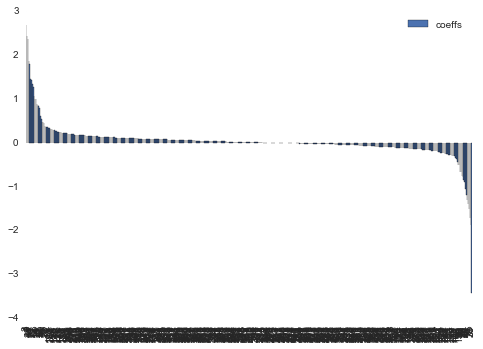

In [2]:
# part e
regr = Lasso(alpha=alphas[alpha_optim])
regr.fit(X_train,y_train)
regr.coef_
[round(x,2) for x in range(len(regr.coef_))]
len(regr.coef_)
len(df.columns)
df_coeffs = pd.DataFrame({'coeffs':regr.coef_})
df_coeffs=df_coeffs.sort(['coeffs'])
df_coeffs[::-1].plot(y='coeffs',kind='bar')
df_coeffs[::-1]['coeffs'].values

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

The model appears to work well on all random subsets. It works best on cross fold 3 but slightly worse on cross folds 1 and 5. 

In [ ]:
import scipy
import numpy
import pandas
import matplotlib
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


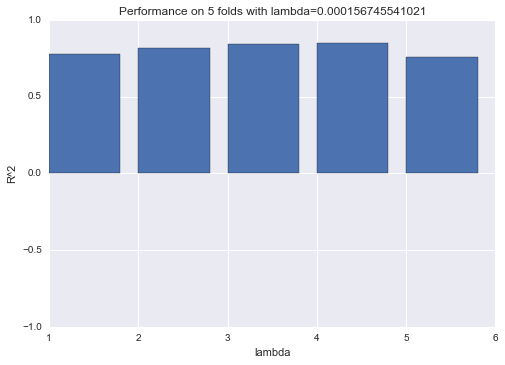

In [7]:
regr = Lasso(alpha=alphas[alpha_optim])
scores = cross_val_score(regr, X, y, cv=5)
plt.ylim([-1,1])
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 5 folds with lambda=' + str(alpha))
plt.bar(range(1,6),scores)
plt.show()

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [8]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs



scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_optim)

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [9]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


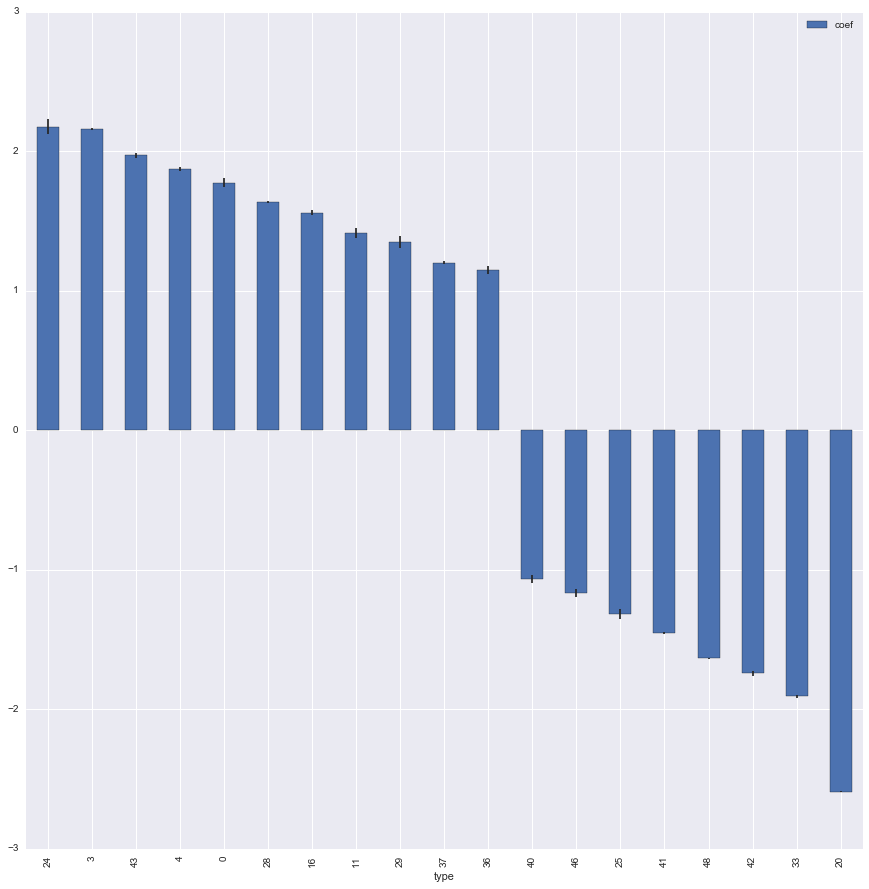

In [10]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))